In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_excel('df_rework_test_clean.xlsx',index_col=0)
df.describe()

,記録対戦数,和了巡数,平均和了,平均放銃,平均順位,和了率,放銃率,ツモ率,ダマ率,流局率,流局聴牌率,副露率,立直率,飛び率
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,548.386861,12.239394,6623.795620,5445.941606,2.347701,0.231144,0.125474,0.375523,0.118910,0.136090,0.477731,0.336009,0.196516,0.063274
std,381.530687,0.166898,292.945215,247.035475,0.074913,0.012792,0.015407,0.021142,0.036729,0.012548,0.062375,0.043561,0.021206,0.018624
min,104.000000,11.858000,5878.000000,4742.000000,2.176000,0.198700,0.088200,0.334700,0.035300,0.103600,0.333000,0.197000,0.127900,0.030000
25%,311.000000,12.128000,6435.000000,5320.000000,2.297000,0.221400,0.116100,0.361500,0.095700,0.128500,0.434000,0.307700,0.181300,0.050300
50%,387.000000,12.244000,6624.000000,5464.000000,2.339000,0.232600,0.123400,0.374000,0.113200,0.136300,0.468600,0.336800,0.198800,0.062000
75%,645.000000,12.340000,6816.000000,5610.000000,2.398000,0.240300,0.135800,0.386400,0.140000,0.143100,0.518400,0.363300,0.211300,0.072600
max,2308.000000,12.816000,7608.000000,6138.000000,2.560000,0.256700,0.175300,0.450200,0.215500,0.179300,0.709800,0.455500,0.252000,0.110100


## 何が和了率に一番影響をおよぼしているのか？

In [2]:
df["平均順位"].max()

2.56

In [3]:
df_min = df.sort_values(by='平均順位', ascending=True).head(30)
df_min

,記録対戦数,和了巡数,平均和了,平均放銃,平均順位,和了率,放銃率,ツモ率,ダマ率,流局率,流局聴牌率,副露率,立直率,飛び率
[聖3] 【腹ペコ】,340,12.214,6576,4913,2.176,0.2454,0.1178,0.3759,0.1300,0.1268,0.5080,0.3284,0.2005,0.0441
[聖3] 富田美咲,377,12.033,6502,5038,2.188,0.2516,0.1115,0.3530,0.1066,0.1339,0.4942,0.3633,0.1826,0.0398
[聖2] ドンモグーラ,482,12.181,6702,5309,2.201,0.2285,0.0975,0.3707,0.1276,0.1461,0.3963,0.3083,0.1819,0.0373
[聖3] お紙らせ,367,12.024,6245,4742,2.215,0.2294,0.0933,0.3549,0.1989,0.1376,0.3883,0.3073,0.1480,0.0300
[聖1] おにぎり以外,452,12.321,6692,5144,2.219,0.2386,0.1117,0.3794,0.0898,0.1352,0.3929,0.2715,0.2302,0.0575
[聖2] べリ,328,12.371,6450,5240,2.226,0.2465,0.1212,0.3771,0.0811,0.1312,0.4484,0.3578,0.1945,0.0488
[聖3] まさちき。,476,12.277,6821,5464,2.231,0.2392,0.1210,0.3640,0.0743,0.1319,0.4548,0.3863,0.1846,0.0441
[魂1] ホワイト05,628,12.097,6376,5340,2.242,0.2322,0.0960,0.3591,0.1109,0.1461,0.3882,0.3026,0.1919,0.0414
[魂1] noprops,600,12.100,6519,5624,2.245,0.2432,0.1030,0.3695,0.0701,0.1326,0.4618,0.3814,0.2164,0.0600
[聖3] 新大和魂,558,11.935,6355,5385,2.246,0.2405,0.1037,0.3349,0.1474,0.1416,0.3584,0.3388,0.1721,0.0412


In [4]:
df_max = df.sort_values(by='平均順位', ascending=False).head(30)
df_max

,記録対戦数,和了巡数,平均和了,平均放銃,平均順位,和了率,放銃率,ツモ率,ダマ率,流局率,流局聴牌率,副露率,立直率,飛び率
[聖2] Sakura丶小荫,116,12.176,6738,5820,2.560,0.2044,0.1248,0.4217,0.0924,0.1552,0.4868,0.3801,0.1839,0.0862
[聖3] ちゃーふぁん,229,12.656,6973,5220,2.541,0.2037,0.1384,0.4118,0.1602,0.1504,0.4341,0.2455,0.2194,0.0786
[魂1] プリのパラ,328,12.305,7063,5603,2.515,0.2091,0.1231,0.4184,0.1325,0.1551,0.4624,0.2878,0.2129,0.0701
[聖3] 麦チャン,351,12.340,7051,5406,2.496,0.1987,0.1180,0.3914,0.2065,0.1571,0.4522,0.2615,0.1773,0.0826
[魂1] ちゃぺたそ,225,12.526,6868,5464,2.493,0.2126,0.1420,0.4360,0.1120,0.1514,0.5337,0.3508,0.2113,0.0756
[魂1] 兼明偏暗,514,12.350,6449,5684,2.492,0.2227,0.1509,0.4025,0.1213,0.1256,0.5218,0.3234,0.1942,0.1012
[聖2] 三三QAQ,104,12.162,6458,5404,2.490,0.2186,0.1603,0.4167,0.1333,0.1248,0.6058,0.4180,0.1585,0.0962
[魂1] 等风来的人,159,12.371,6738,5866,2.484,0.2050,0.1268,0.3621,0.1003,0.1793,0.4936,0.3564,0.2085,0.0503
[聖3] 藍,176,12.478,6377,5416,2.472,0.2171,0.1157,0.3947,0.1017,0.1393,0.4642,0.3822,0.1898,0.0398
[魂1] けい1987,223,12.260,6599,4950,2.471,0.2221,0.1260,0.3985,0.0977,0.1353,0.4340,0.3481,0.2034,0.0359


In [5]:
df_min.describe()

,記録対戦数,和了巡数,平均和了,平均放銃,平均順位,和了率,放銃率,ツモ率,ダマ率,流局率,流局聴牌率,副露率,立直率,飛び率
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,446.300000,12.150000,6523.233333,5308.100000,2.252567,0.237773,0.112060,0.367380,0.109533,0.138357,0.440827,0.342277,0.191663,0.048770
std,141.694949,0.130741,222.952861,236.563376,0.029867,0.009064,0.010213,0.013709,0.037534,0.007780,0.058390,0.036263,0.020017,0.011290
min,216.000000,11.935000,5982.000000,4742.000000,2.176000,0.217100,0.088200,0.334900,0.043500,0.125100,0.333000,0.271500,0.148000,0.030000
25%,345.750000,12.036500,6378.250000,5117.000000,2.242750,0.231225,0.104575,0.359600,0.087025,0.132175,0.393650,0.311600,0.176150,0.039725
50%,388.000000,12.138500,6509.000000,5351.500000,2.255500,0.238750,0.113550,0.366050,0.101650,0.137450,0.437200,0.344450,0.191250,0.049100
75%,534.500000,12.262000,6689.750000,5449.250000,2.276250,0.242750,0.120500,0.375125,0.128200,0.145300,0.477750,0.361925,0.205075,0.058475
max,911.000000,12.396000,6915.000000,5813.000000,2.289000,0.256200,0.125400,0.400000,0.215500,0.153100,0.559700,0.429700,0.230300,0.069800


In [6]:
df_max.describe()

,記録対戦数,和了巡数,平均和了,平均放銃,平均順位,和了率,放銃率,ツモ率,ダマ率,流局率,流局聴牌率,副露率,立直率,飛び率
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,351.766667,12.339300,6763.566667,5531.966667,2.454400,0.219380,0.136323,0.39459,0.124577,0.139303,0.498773,0.331783,0.197640,0.077500
std,268.164860,0.201228,288.648179,278.897025,0.040434,0.010846,0.016773,0.02174,0.038902,0.017341,0.073384,0.046048,0.024110,0.021136
min,104.000000,11.877000,6230.000000,4859.000000,2.409000,0.198700,0.111300,0.35000,0.035300,0.103600,0.387500,0.245500,0.144100,0.035900
25%,187.500000,12.232500,6599.250000,5408.500000,2.419250,0.212950,0.124525,0.38095,0.098575,0.127450,0.444625,0.305725,0.185300,0.066500
50%,290.000000,12.345000,6702.500000,5578.000000,2.449500,0.218300,0.130800,0.38950,0.121650,0.140000,0.486950,0.327600,0.199850,0.080000
75%,428.250000,12.472750,6965.250000,5696.000000,2.481000,0.226025,0.145550,0.41145,0.149350,0.151150,0.543225,0.356175,0.212375,0.095825
max,1172.000000,12.816000,7608.000000,5953.000000,2.560000,0.241800,0.175300,0.45020,0.206500,0.179300,0.709800,0.441800,0.252000,0.105800


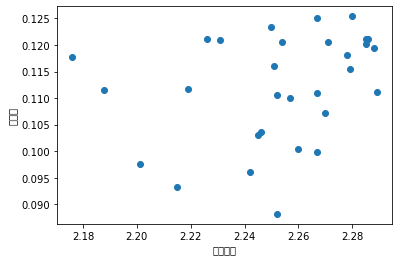

In [18]:
x = '平均順位'
y = '放銃率'

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.scatter(df_min[x],df_min[y],)

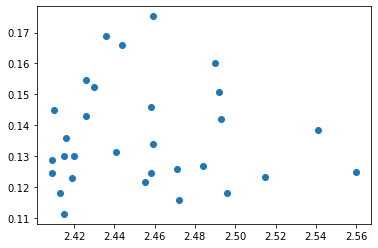

In [17]:
x = '平均順位'
y = '放銃率'

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_max[x],df_max[y],)

In [8]:
df_min.corr()

,記録対戦数,和了巡数,平均和了,平均放銃,平均順位,和了率,放銃率,ツモ率,ダマ率,流局率,流局聴牌率,副露率,立直率,飛び率
記録対戦数,1.000000,-0.071546,-0.017654,0.182887,0.093612,-0.003962,-0.183777,-0.183524,-0.131287,0.172730,-0.239316,0.137362,0.010490,-0.043055
和了巡数,-0.071546,1.000000,0.618641,0.039681,0.125988,-0.108098,0.334835,0.455592,-0.243690,-0.125759,0.235737,-0.022773,0.273504,0.080883
平均和了,-0.017654,0.618641,1.000000,0.024348,0.055233,-0.565229,0.094982,0.518887,-0.309120,0.270533,-0.106117,-0.391831,0.373801,-0.063042
平均放銃,0.182887,0.039681,0.024348,1.000000,0.452420,0.061768,0.114606,-0.002258,-0.462973,0.113929,0.164519,0.372394,0.288043,0.579320
平均順位,0.093612,0.125988,0.055233,0.452420,1.000000,-0.143492,0.292429,0.134095,-0.171164,0.239700,0.087880,0.206794,0.132132,0.318506
和了率,-0.003962,-0.108098,-0.565229,0.061768,-0.143492,1.000000,0.519771,-0.307688,-0.060735,-0.665067,0.651155,0.652239,0.122080,0.194613
放銃率,-0.183777,0.334835,0.094982,0.114606,0.292429,0.519771,1.000000,0.192510,-0.295628,-0.553966,0.654343,0.439107,0.371971,0.374618
ツモ率,-0.183524,0.455592,0.518887,-0.002258,0.134095,-0.307688,0.192510,1.000000,-0.381997,0.045388,0.239264,-0.212460,0.448539,0.084584
ダマ率,-0.131287,-0.243690,-0.309120,-0.462973,-0.171164,-0.060735,-0.295628,-0.381997,1.000000,-0.008745,-0.305973,-0.318604,-0.763519,-0.241672
流局率,0.172730,-0.125759,0.270533,0.113929,0.239700,-0.665067,-0.553966,0.045388,-0.008745,1.000000,-0.623620,-0.448266,-0.069845,-0.208485


In [9]:
df_max.corr()

,記録対戦数,和了巡数,平均和了,平均放銃,平均順位,和了率,放銃率,ツモ率,ダマ率,流局率,流局聴牌率,副露率,立直率,飛び率
記録対戦数,1.000000,0.335026,0.153857,0.374116,-0.166234,0.572989,0.644452,-0.505819,0.119870,-0.630528,0.669050,0.184474,0.054427,0.310955
和了巡数,0.335026,1.000000,0.645103,0.432160,0.081346,0.149150,0.500889,-0.051063,-0.089185,-0.440330,0.392831,-0.122988,0.433076,0.411853
平均和了,0.153857,0.645103,1.000000,0.457717,0.058198,-0.170168,0.200488,-0.000594,-0.076838,-0.129207,0.059589,-0.550811,0.525719,0.423983
平均放銃,0.374116,0.432160,0.457717,1.000000,0.067795,0.152306,0.356383,-0.139982,-0.265834,-0.240981,0.434408,0.000492,0.388952,0.638236
平均順位,-0.166234,0.081346,0.058198,0.067795,1.000000,-0.546110,-0.019315,0.425592,0.007530,0.237015,-0.039431,-0.024972,0.017382,0.062783
和了率,0.572989,0.149150,-0.170168,0.152306,-0.546110,1.000000,0.604572,-0.415431,-0.108683,-0.734080,0.591352,0.414575,0.072144,0.116804
放銃率,0.644452,0.500889,0.200488,0.356383,-0.019315,0.604572,1.000000,-0.164090,-0.167210,-0.794356,0.839372,0.345167,0.216401,0.539207
ツモ率,-0.505819,-0.051063,-0.000594,-0.139982,0.425592,-0.415431,-0.164090,1.000000,0.067748,0.140182,-0.110523,-0.151100,-0.031059,0.154040
ダマ率,0.119870,-0.089185,-0.076838,-0.265834,0.007530,-0.108683,-0.167210,0.067748,1.000000,0.050988,-0.084839,-0.203115,-0.641728,-0.067901
流局率,-0.630528,-0.440330,-0.129207,-0.240981,0.237015,-0.734080,-0.794356,0.140182,0.050988,1.000000,-0.680528,-0.318635,-0.034849,-0.511329


C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37682 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23550 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_

C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 29260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21103 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_

C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 35352 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 37682 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 23550 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 25126 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203

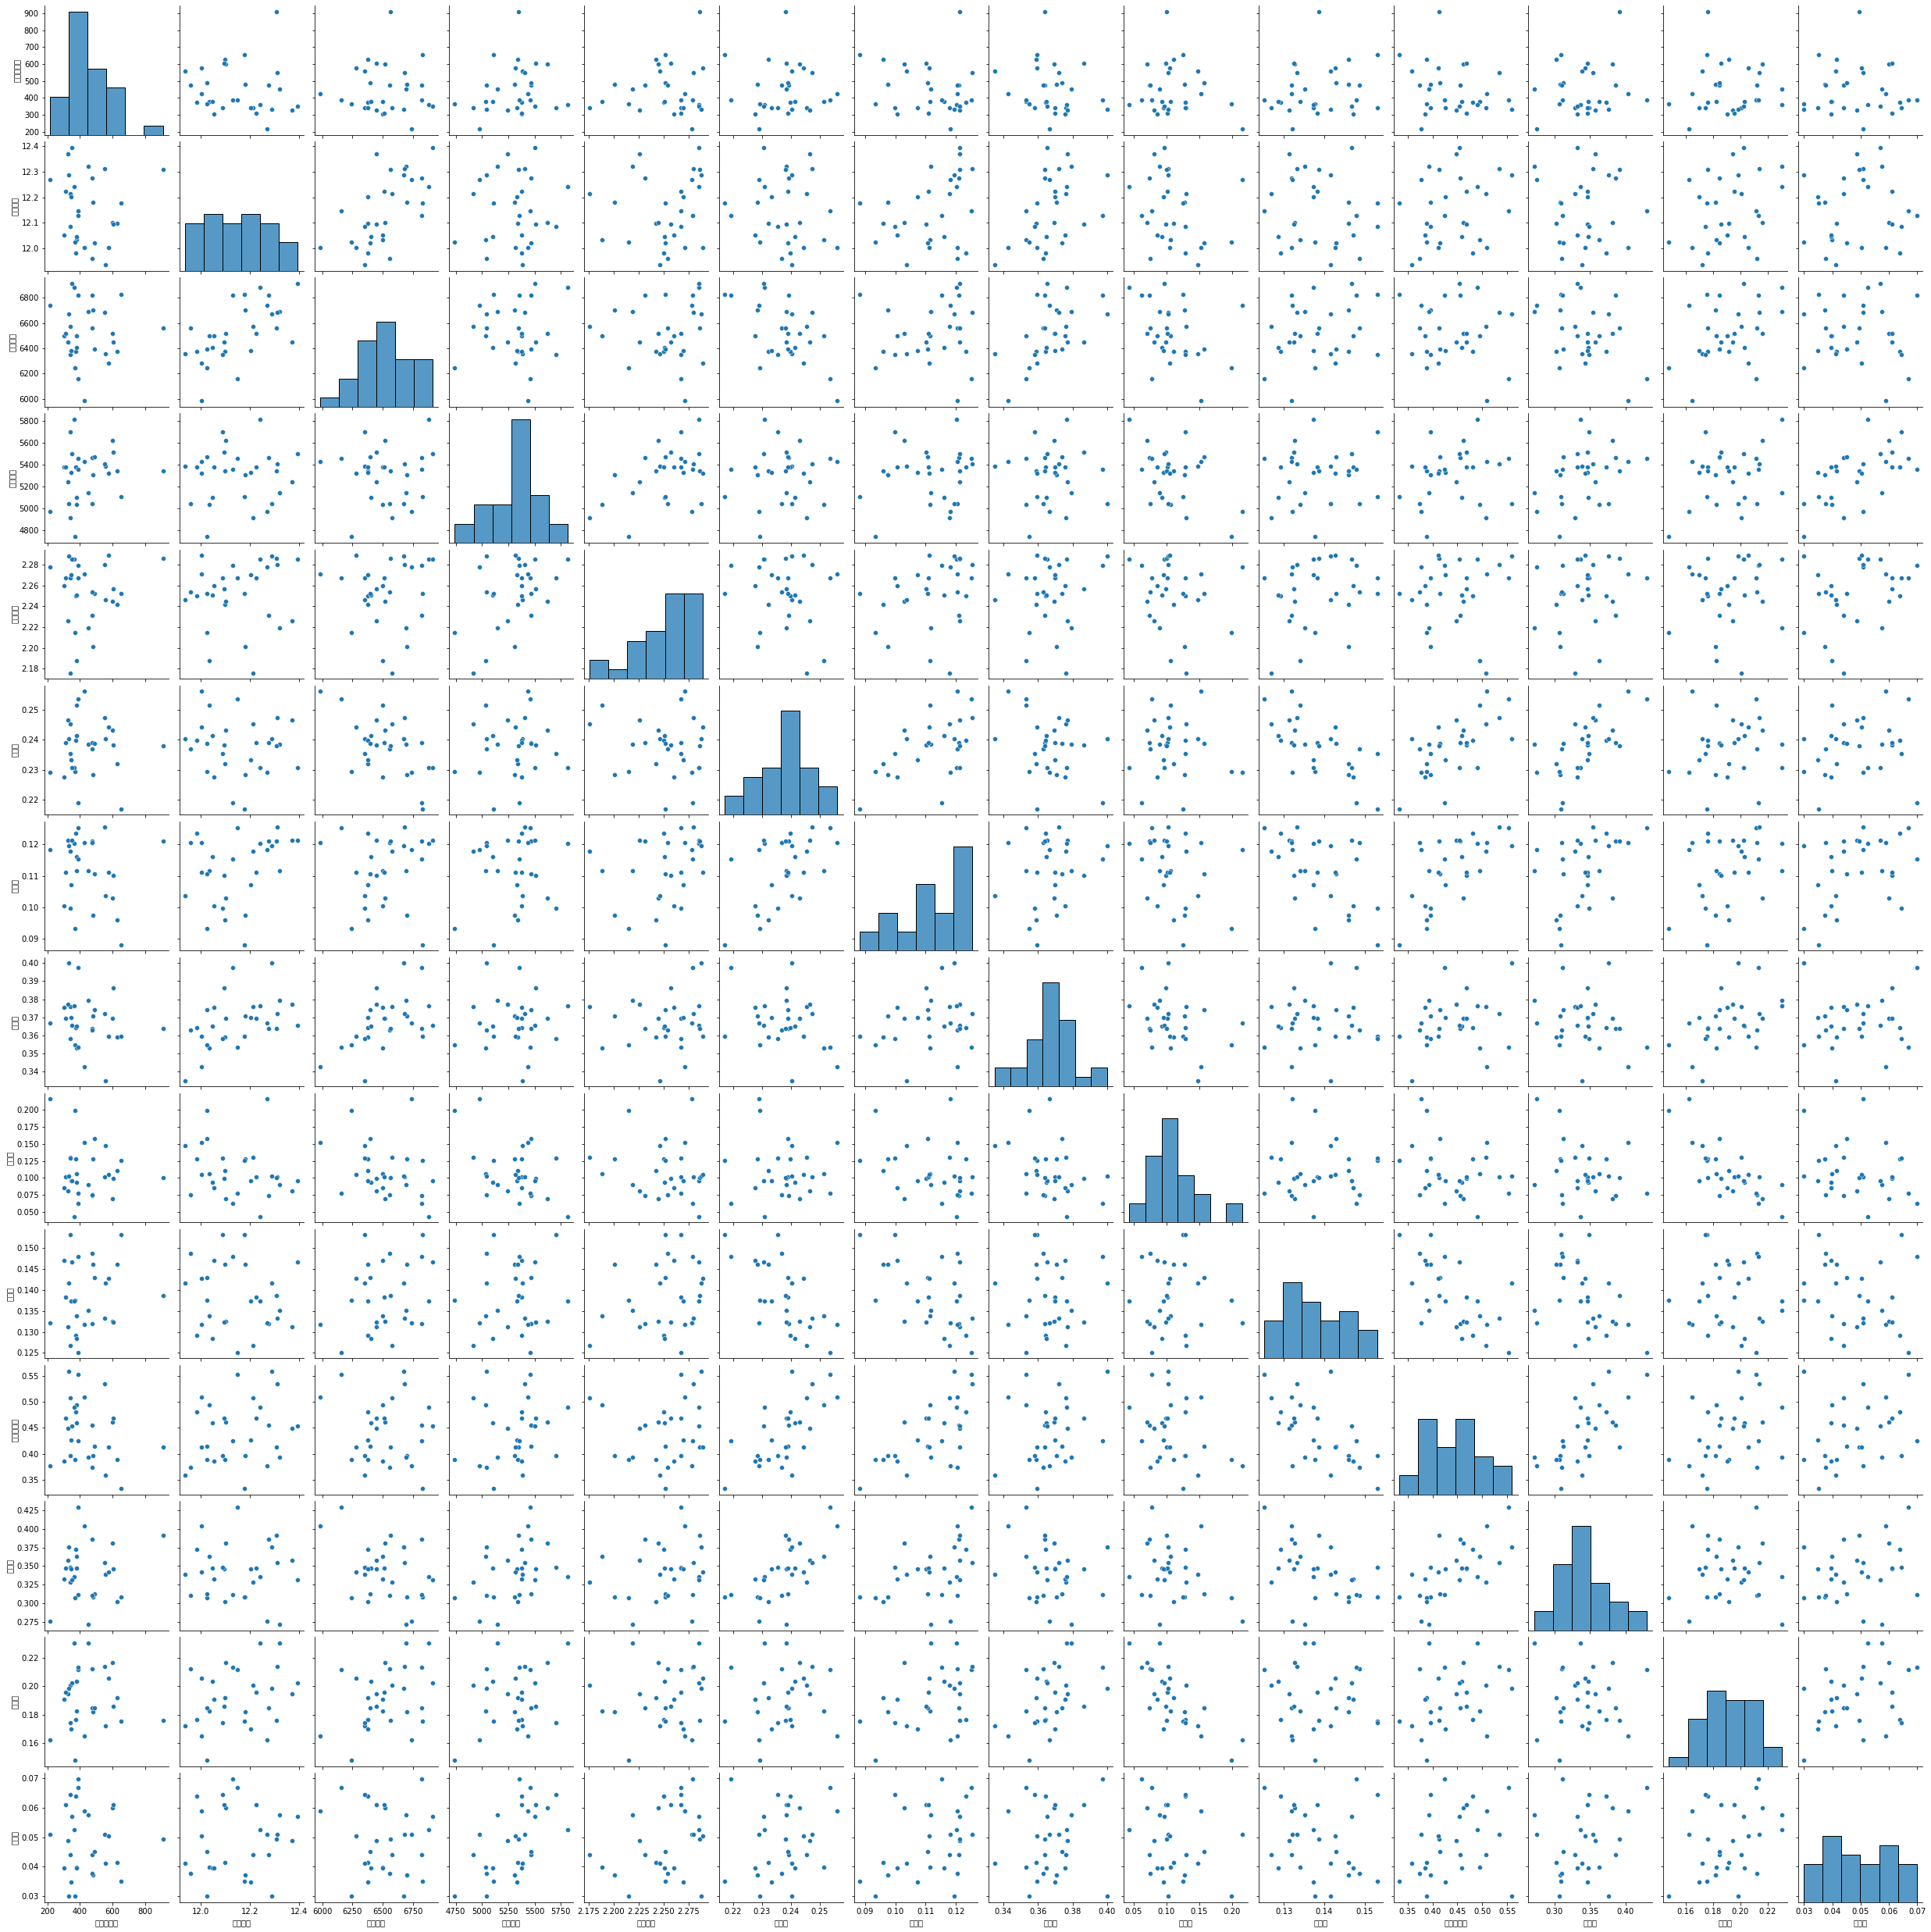

In [30]:
sns.pairplot(df_min)

C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37682 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23550 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_

C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 29260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21103 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_

C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 35352 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 37682 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 23550 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 25126 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ShimizhuMamiya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203

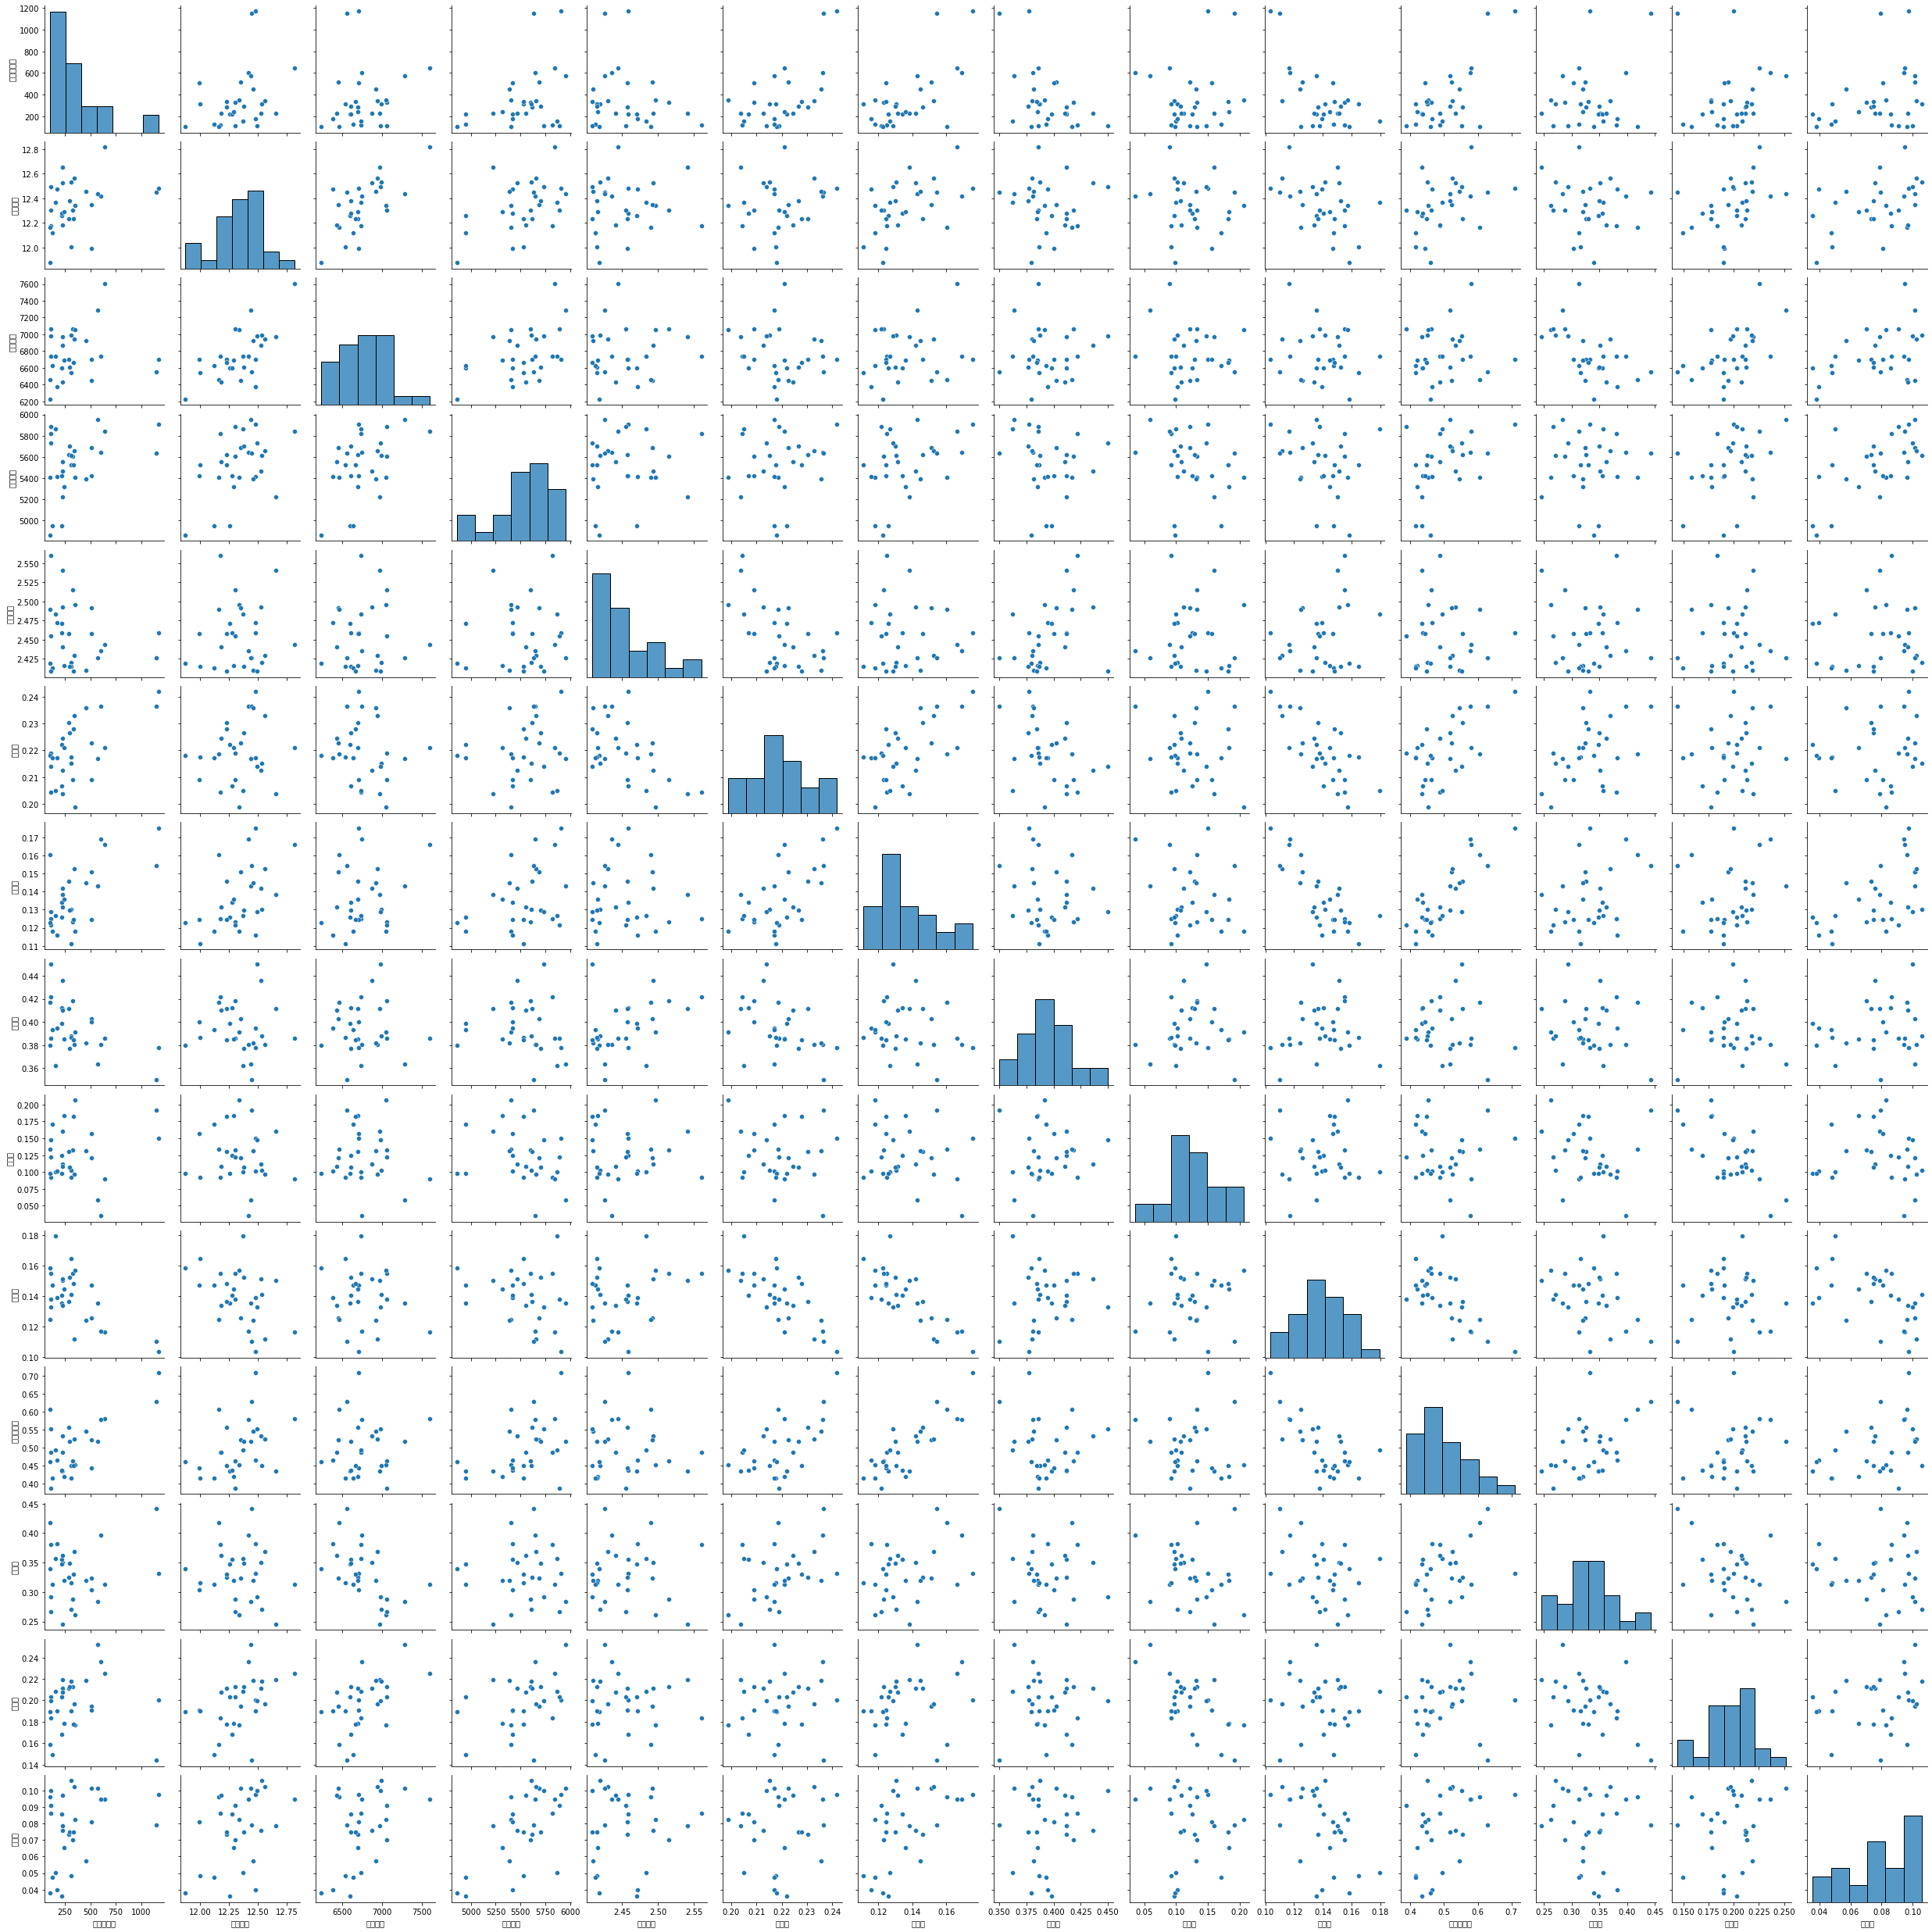

In [6]:
sns.pairplot(df_max)